<img src="imagens/md-logo.jpg" width="96" height="96" align="left"/>

# Clustering - Exercícios

<font color=blue><b> Bootcamp Minerando Dados</b></font><br>
 www.minerandodados.com.br  

Exercícios realizados no Bootcamp Data Science do Zero - dias 17 e 18 de novembro/2018 - carga horária de 16 horas
Autor: Lourdes Souza

1) Importe as bibliotecas para visualização de dados e clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import DistanceMetriciris

2) Leia a base de dados **iris.csv** localizada no diretorio **datasets** e crie um Dataframe.

In [2]:
iris = pd.read_csv("datasets/iris.csv")


3) Retorne os **top 10 registros** da base de dados

In [4]:
iris.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


4) Armazene apenas as **features e seus dados** na variável train

In [6]:
train = iris.drop('Species',axis=1)

5) Armazene os dados de classes na variável classes

In [8]:
classes = iris.Species

6) Utilizando a função abaixo, aplique nos dados de classe para **converter os dados categóricos em numéricos**

In [9]:
def converte_classe(l):
    if l == 'Iris-virginica':
        return 0
    elif l == 'Iris-setosa':
        return 1
    elif l == 'Iris-versicolor':
        return 2

In [10]:
classes = classes.apply(converte_classe)

7) Crie uma função que faça o **calculo da distância euclidiana em dois vetores**

In [13]:
def distancia_euclides(a,b):
    dist = DistanceMetric.get_metric('euclidean')
    return dist.pairwise(a,b)

8) Utilizando a função criada anteriormente faça:

- Calcule a distância entre os vetores **v1 e v2** abaixo
> v1 = [1.2,1,2.1,1]<br>
> v2 = [1,1.9,5.4,3.2]

In [21]:
v1 = [[1.2,1,2.1,1]]


In [22]:
v2 = [[1,1.9,5.4,3.2]]


In [23]:
distancia_euclides(v1,v2)

array([[4.07185461]])

- Calcule a distância entre os vetores **v3 e v4** abaixo e explique o retorno
> v3 = [0.5,0,2.1,1.5]<br>
> v4 = [0.5,0,2.1,1.5]

In [24]:
v3 = [[0.5,0,2.1,1.5]]
v4 = [[0.5,0,2.1,1.5]]

In [25]:
distancia_euclides(v3,v4)

array([[0.]])

Os vetores são iguais,portanto a distancia = 0

9) Instâncie o algoritmo Kmeans com o número de clusters **igual ao número de classes** da sua base de dados.

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'random')

10) Execute o algoritmo Kmeans com os dados da base de dados

In [30]:
kmeans.fit(train)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

11) Imprima os valores dos **centroides**

In [36]:
centroides = kmeans.cluster_centers_


In [37]:
centroides

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ]])

12) Selecione **três amostras da base de dados e calcule a distância euclidiana entre as amostras de dados e cada um dos valores de centroids**

In [41]:
for i in train.values[:3]:
    for w in centroides:
        dist = distancia_euclides([i],[w]) 
        print(dist) 

   
  

[[5.0595416]]
[[3.41925061]]
[[0.14694217]]
[[5.11494335]]
[[3.39857426]]
[[0.43816892]]
[[5.27935534]]
[[3.56935666]]
[[0.41230086]]


- DICA: Use um laço for...

13) Gere a **tabela de distância** e verifique os valores através do método fit_transform()

In [42]:
distancia = kmeans.fit_transform(X)
distancia

array([[5.0595416 , 0.14694217, 3.41925061],
       [5.11494335, 0.43816892, 3.39857426],
       [5.27935534, 0.41230086, 3.56935666],
       [5.15358977, 0.51883716, 3.42240962],
       [5.10433388, 0.19796969, 3.46726403],
       [4.68148797, 0.68380699, 3.14673162],
       [5.21147652, 0.41520116, 3.51650264],
       [5.00252706, 0.0599333 , 3.33654987],
       [5.32798107, 0.80099438, 3.57233779],
       [5.06790865, 0.36659514, 3.3583767 ],
       [4.89806763, 0.48784424, 3.32449131],
       [4.9966845 , 0.25138019, 3.31126872],
       [5.19103612, 0.49192682, 3.46661272],
       [5.65173594, 0.90906105, 3.90578362],
       [5.10804455, 1.02019214, 3.646649  ],
       [4.88564095, 1.21309192, 3.49427881],
       [5.03090587, 0.66241377, 3.495248  ],
       [5.02342022, 0.1509702 , 3.38444981],
       [4.61792995, 0.82848778, 3.11245944],
       [4.97213426, 0.39898872, 3.37738931],
       [4.6955761 , 0.46172719, 3.07471224],
       [4.9236821 , 0.33762701, 3.31506588],
       [5.

14) Utilizando o método **predict()** defina novos valores de dados e faça a predição

In [43]:
data = [
        [ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]
    ]
kmeans.predict(data)

array([1, 0, 2])

15) Com os códigos da prática anterior visualize os resultados de forma gráfica

<IPython.core.display.Javascript object>


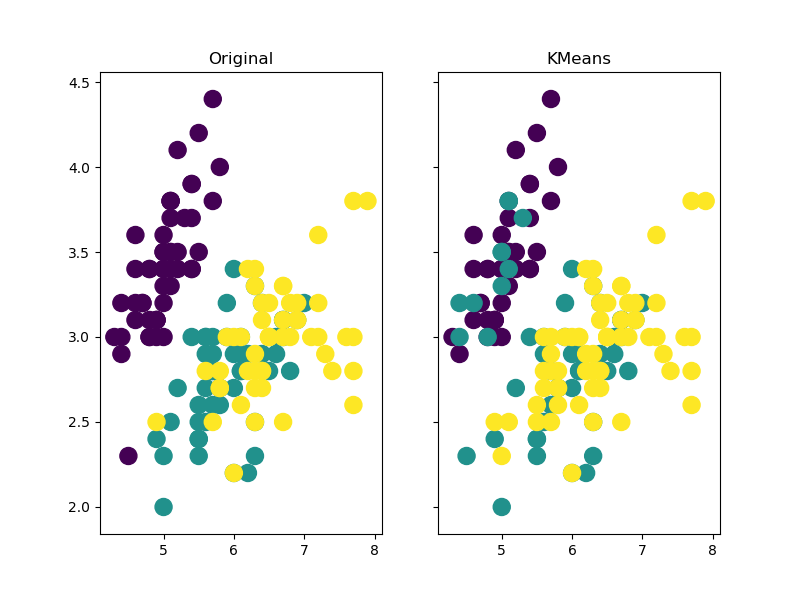

In [44]:
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(train['SepalLength'], train['SepalWidth'],s=150,c=sorted(classes))
ax2.set_title('KMeans')
ax2.scatter(train['SepalLength'], train['SepalWidth'],s=150,c=sorted(kmeans.labels_))